# Autoencoder for two-in-two-out (2i2o) dataset

### Required packages: os, numpy, matplotlib, Tensorflow

## Loading 2i2o dataset and normalizing x- and y-coordinates

In [1]:
import os
import numpy as np

dir = os.getcwd()
data = np.load(str(dir + "/2i2o_4vect.npy"))

In [2]:
norm_c0 = np.mean(data[:,0])
data[:,0] = (data[:,0] - norm_c0) / norm_c0

norm_c1 = np.mean(data[:,1])
data[:,1] = (data[:,1] - norm_c1) / norm_c1

## Quiver plot of initial, normalized two-in-two-out dataset on which our autoencoder will be trained

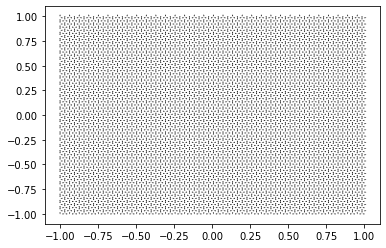

In [3]:
import matplotlib.pyplot as plt

plt.quiver(data[:,0], data[:,1], data[:,2], data[:,3])
plt.show()

## Building and training the autoencoder

In [4]:
import tensorflow as tf
import tensorflow.keras as keras

inputs = keras.Input(shape = (4,))

x = keras.layers.Dense(512, activation = "tanh")(inputs)
x = keras.layers.Dense(512, activation = "tanh")(x)

outputs = keras.layers.Dense(4, activation = "tanh")(x)


model = keras.Model(inputs = inputs, outputs = outputs, name = "quiver_autoencoder")
model.summary()

Model: "quiver_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 512)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2052      
Total params: 267,268
Trainable params: 267,268
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer = "Adam",
             loss = "mean_squared_error",
             metrics = ["mean_squared_error", "accuracy"])

In [6]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

description = "512-neurons-tanh" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs_quiver/fit/" + description + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [7]:
model.fit(data, data, callbacks = [tensorboard_callback], epochs = 50)

Epoch 1/50
  1/256 [..............................] - ETA: 1:38 - loss: 0.3560 - mean_squared_error: 0.3560 - accuracy: 0.5000WARNING:tensorflow:From /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1371: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
256/256 [==============================] - 1s 5ms/step - loss: 0.0173 - mean_squared_error: 0.0173 - accuracy: 0.9624
Epoch 2/50
256/256 [==============================] - 1s 3ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - accuracy: 0.9810
Epoch 3/50
256/256 [==============================] - 1s 3ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - accuracy: 0.9808
Epoch 4/50
256/256 [==============================] - 1s 3ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - accuracy: 0.9795
Epoch 5/50
256/256 [==============================] 

## Use TensorBoard to track accuracy of different NN architectures 

In [8]:
%load_ext tensorboard
%tensorboard --logdir logs_quiver

## Save the autoencoder

In [9]:
model.save("quiver_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: quiver_model/assets


## Run the autoencoder on the 2i2o data and print the model's accuracy metrics

In [10]:
predictions = model.predict(data)

results = model.evaluate(data, data)
print(results)

256/256 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - accuracy: 0.9844
[0.002145044505596161, 0.002145044505596161, 0.984375]


## Plot the 2i2o data and the autoencoder's mapping of the 2i2o data with quiver plots

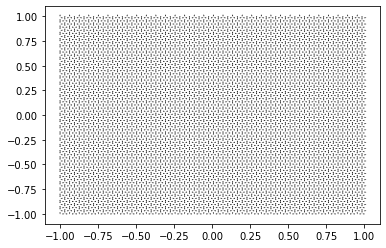

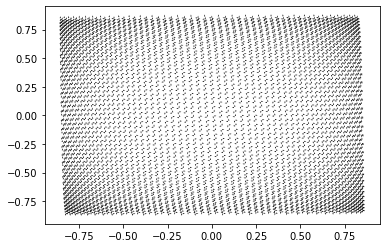

In [11]:
plt.quiver(data[:,0], data[:,1], data[:,2], data[:,3])
plt.show()

plt.quiver(predictions[:,0], predictions[:,1], predictions[:,2], predictions[:,3])
plt.show()

## Load and normalize the large 2i20 dataset

In [12]:
large_data= np.load(str(dir + "/2i2o_4vect_2_rescaled.npy"))

norm_c0 = np.mean(large_data[:,0])
large_data[:,0] = (large_data[:,0] - norm_c0) / norm_c0

norm_c1 = np.mean(large_data[:,1])
large_data[:,1] = (large_data[:,1] - norm_c1) / norm_c1

## Run the autoencoder on the large 2i2o dataset and print the model's accuracy metrics

In [13]:
large_predictions = model.predict(large_data)

model.evaluate(large_data, large_data)

1024/1024 [==============================] - 1s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - accuracy: 0.9866


[0.0021049585193395615, 0.0021049585193395615, 0.986602783203125]

## Plot the large 2i2o data and the autoencoder's mapping of the large 2i2o data with quiver plots 

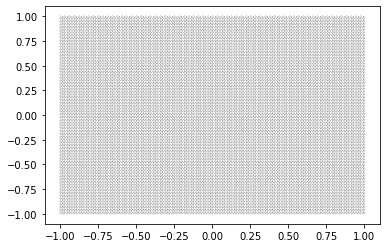

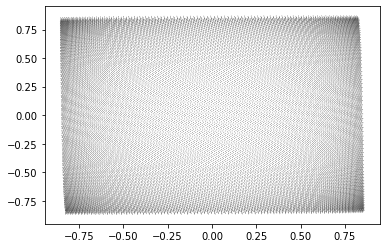

In [14]:
plt.quiver(large_data[:,0], large_data[:,1], large_data[:,2], large_data[:,3])
plt.show()

plt.quiver(large_predictions[:,0], large_predictions[:,1], large_predictions[:,2], large_predictions[:,3])
plt.show()

## Save the autoencoder's mapping of the large 2i2o dataset 

In [15]:
np.save("autoencoder_predictions.npy", large_predictions)